# 1) Delivery_time -> Predict delivery time using sorting time  

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('delivery_time.csv') 

In [ ]:
# EDA 

In [23]:
df.head() 

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [24]:
df.describe()  

,Delivery,Sorting
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [25]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Delivery  21 non-null     float64
 1   Sorting   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [26]:
df.columns 

Index(['Delivery', 'Sorting'], dtype='object')

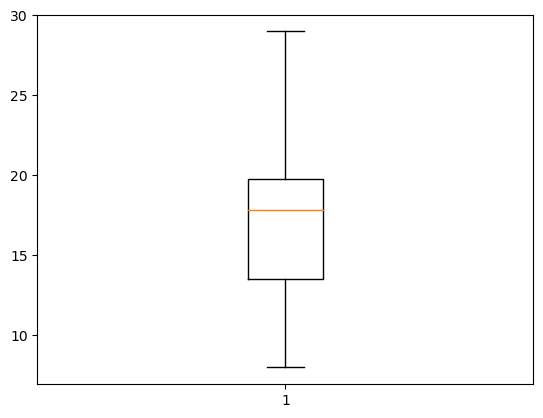

In [27]:
plt.boxplot(df["Delivery"]) 
plt.show() 

In [12]:
import warnings
warnings.filterwarnings('ignore')


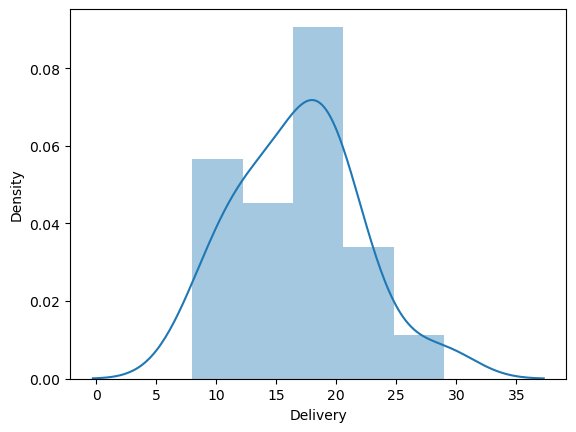

In [28]:
sns.distplot(df["Delivery"]) 
plt.show() 

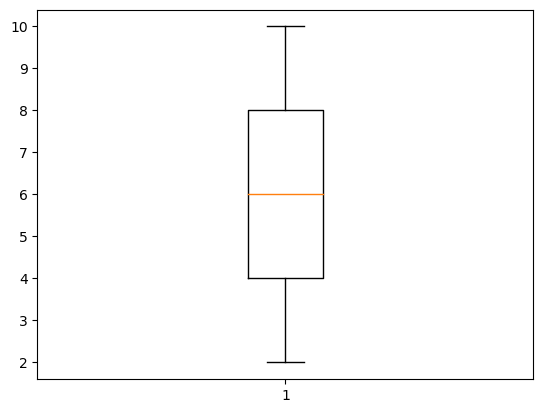

In [29]:
plt.boxplot(df["Sorting"]) 
plt.show() 

<AxesSubplot:xlabel='Sorting', ylabel='Density'>

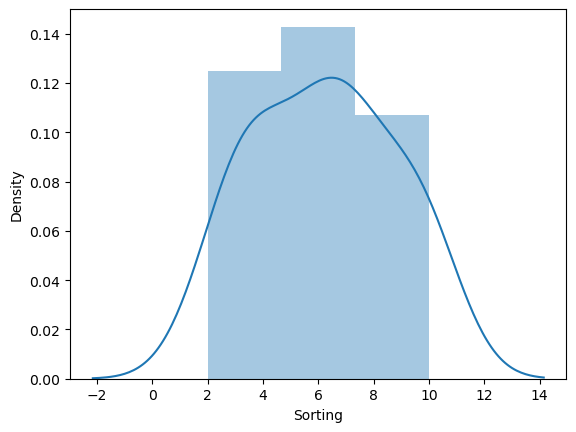

In [30]:
sns.distplot(df['Sorting']) 

Text(0.5, 1.0, 'ScatterPlot')

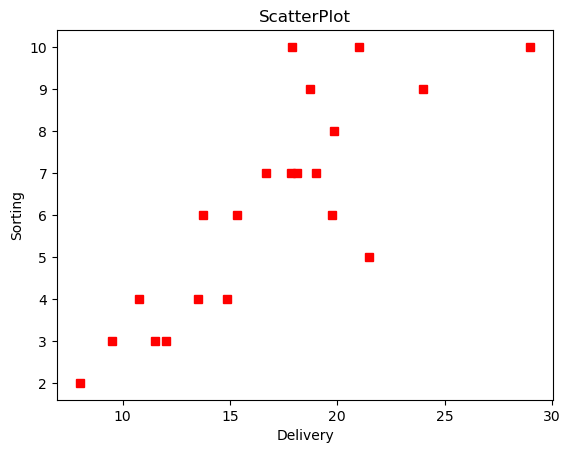

In [31]:
plt.plot(df['Delivery'],df['Sorting'],"rs")
plt.xlabel("Delivery")
plt.ylabel("Sorting")
plt.title("ScatterPlot") 

# Correlation Analysis

In [18]:
df.corr() 

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# model Building 

In [32]:
import statsmodels.formula.api as smf
model=smf.ols("Delivery~Sorting",data=df).fit() 
model.params 

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [34]:
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        14:26:18   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model.resid 

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [37]:
pred = model.predict(df.Sorting) 

In [38]:
pred 

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

Text(0, 0.5, 'Delivery-time')

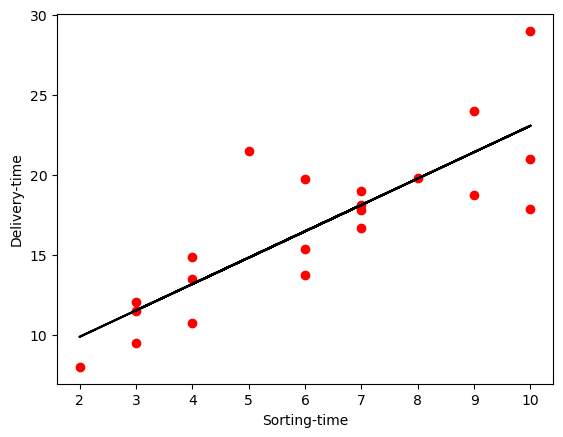

In [44]:
plt.scatter(x=df['Sorting'],y=df['Delivery'],color='red')
plt.plot(df['Sorting'],pred,color='black')
plt.xlabel('Sorting-time')
plt.ylabel('Delivery-time')   

In [45]:
# model 2 

In [46]:
model2 = smf.ols('Delivery~np.log(Sorting)',data=df).fit() 

In [47]:
model2.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        15:04:29   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model2.resid  

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [49]:
pred2 = model2.predict(df.Sorting) 
pred2 

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [66]:
    

rmse_log = np.sqrt(np.mean((np.array(df['Delivery'])-np.array(pred2))**2)) 
rmse_log 

2.733171476682066

In [67]:
pred2.corr(df.Delivery) 

0.8339325279256244

Text(0, 0.5, 'Delivery-time')

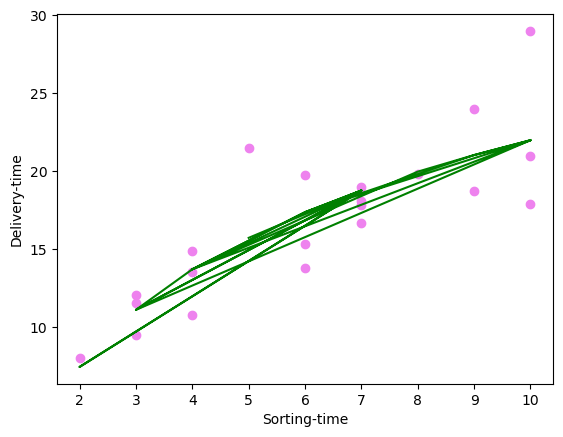

In [53]:
plt.scatter(x=df['Sorting'],y=df['Delivery'],color='violet')
plt.plot(df['Sorting'],pred2,color='green')
plt.xlabel('Sorting-time')
plt.ylabel('Delivery-time')   

In [54]:
# exponential 

In [55]:
model3 = smf.ols('np.log(Delivery)~Sorting',data=df).fit()
model3.params
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Delivery)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                        15:13:18   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
Sorting        0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
pred_log = model3.predict(pd.DataFrame(df['Sorting'])) 
pred_log 

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [62]:
pred3=np.exp(pred_log)  # as we have used log(delivery) in preparing model so we need to convert it back
pred3 

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [70]:
sort_resid = model3.resid_pearson
sort_resid 

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Delivery-time')

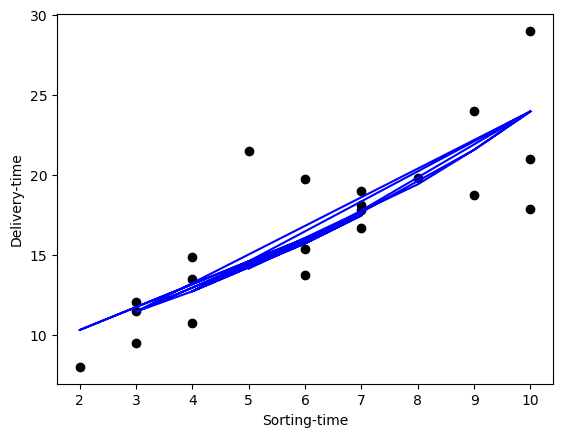

In [68]:
plt.scatter(x=df['Sorting'],y=df['Delivery'],color='black')
plt.plot(df['Sorting'],pred3,color='blue')
plt.xlabel('Sorting-time') 
plt.ylabel('Delivery-time')   

In [64]:
rmse_exp = np.sqrt(np.mean((np.array(df['Delivery'])-np.array(pred3))**2)) 
rmse_exp 

2.940250323056201

In [65]:
pred3.corr(df.Delivery) 

0.808578010828926

In [71]:
df["Sorting_Sq"] = df.Sorting*df.Sorting
df  

,Delivery,Sorting,Sorting_Sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [72]:
#model_quad.params 
model_quad = smf.ols("np.log(Delivery)~Sorting+Sorting_Sq",data=df).fit()


In [73]:
model_quad.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Delivery)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           2.20e-06
Time:                        15:38:18   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
Sorting        0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
pred_quad = model_quad.predict(df)
pred4=np.exp(pred_quad)  # as we have used log(delivery ) in preparing model so we need to convert it back
pred4


0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [76]:
rmse_quad = np.sqrt(np.mean((np.array(df['Delivery'])-np.array(pred4))**2))
rmse_quad  

2.799041988740925

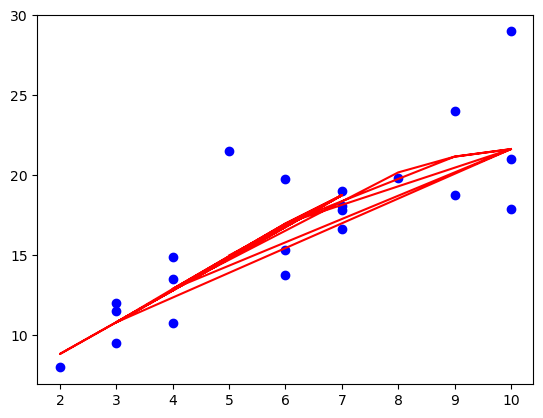

In [77]:
plt.scatter(df.Sorting,df.Delivery,c="b")
plt.plot(df.Sorting,pred4,"r") 

Text(0, 0.5, 'Standardized Residual')

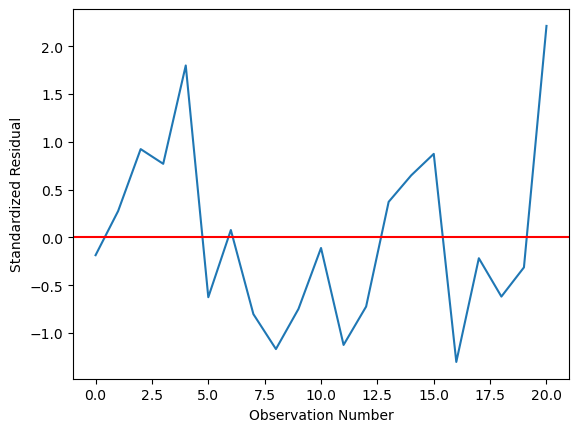

In [78]:
plt.plot(np.arange(21),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")   

In [ ]:
# model 4 has highest r square value , least rmse value  . So we are considering this model 